In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# DATA_SOURCE = "PC_s10k_n50_swap"
DATA_SOURCE = "T14s_s10k_n50_swap"

class Colors:
    C21 = "#00ADD8"
    C22 = "#339933"

bench21 = pd.read_csv(f"results/{DATA_SOURCE}/21/summary.csv", header=0)
bench22 = pd.read_csv(f"results/{DATA_SOURCE}/22/summary.csv", header=0)

def stats(metric, name):
    b21 = bench21.groupby("metric").get_group(
        metric).filter(items=["name", "avg", "sd"]).groupby(
            "name").get_group(name).values[0]
    b22 = bench22.groupby("metric").get_group(
        metric).filter(items=["name", "avg", "sd"]).groupby(
            "name").get_group(name).values[0]
    return ((b21[1], b21[2]), (b22[1], b22[2]))

def plot(stat, names):
    fig, axes = plt.subplots(ncols=len(names), figsize=(3 * len(names), 5), )
    for i in range(len(names)):
        name = names[i]
        (b21, b22) = stats(stat, name)
        axes[i].bar((f"{name} 21", f"{name} 22"), (b21[0], b22[0]), yerr=(b21[1], b22[1]), error_kw=dict(
            capsize=5, alpha=0.7), color=(Colors.C21, Colors.C22))
    fig.tight_layout()
    plt.show()

def div_safe(dividend, divisor):
    if dividend == 0:
        return 0
    if divisor == 0:
        return "Infinite"
    return dividend / divisor


def compare(metric, names):
    B = "Benchmark"
    V21 = "Go v1.21"
    V22 = "Go v1.22"
    R = "Rate"
    d = {B: [], V21: [], V22: [], R: []}
    for name in names:
        ((v21, _), (v22, _)) = stats(metric, name)
        d[B].append(name)
        d[V21].append(v21)
        d[V22].append(v22)
        d[R].append(div_safe(v22, v21))

    df = pd.DataFrame(d)
    return df

## Nanoseconds per Operation

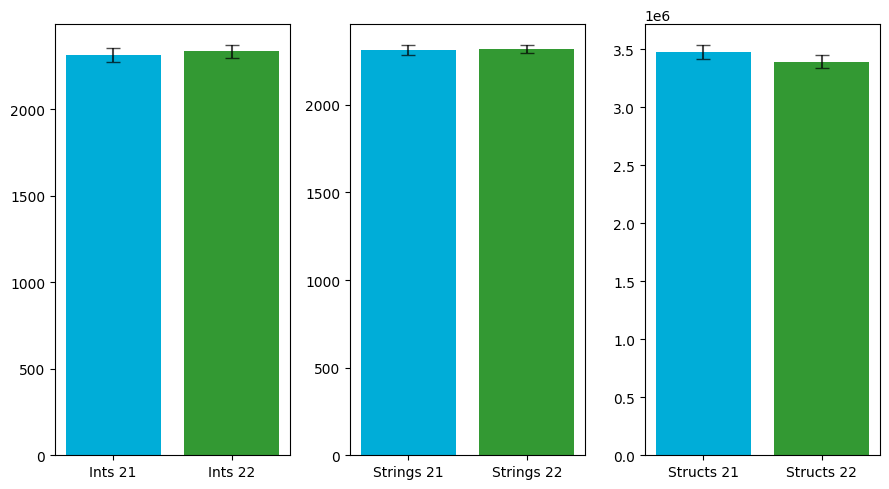

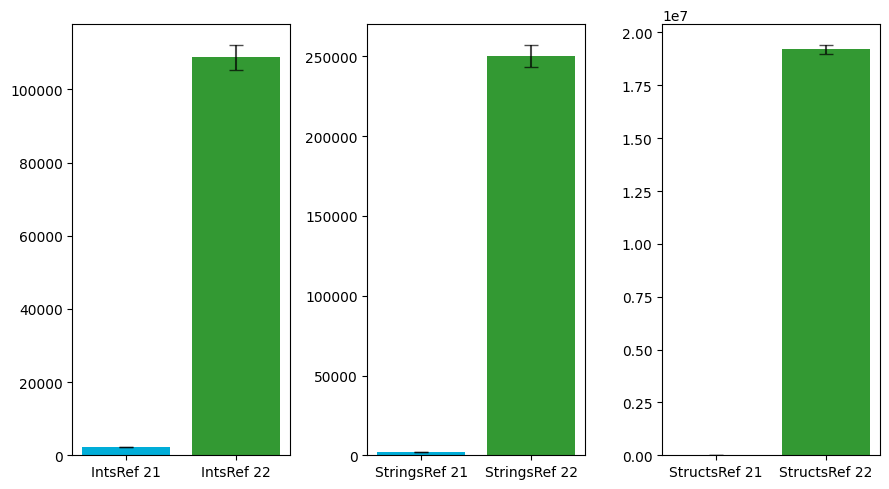

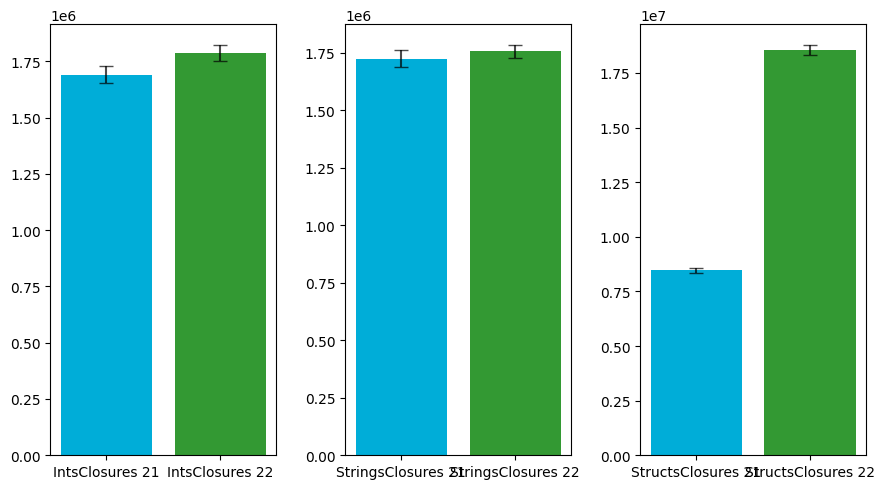

In [2]:
plot("ns/op", ("Ints", "Strings", "Structs"))
plot("ns/op", ("IntsRef", "StringsRef", "StructsRef"))
plot("ns/op", ("IntsClosures", "StringsClosures", "StructsClosures"))

In [3]:
compare("ns/op", ("Ints", "Strings", "Structs"))

,Benchmark,Go v1.21,Go v1.22,Rate
0,Ints,2313.30,2335.68,1.009674
1,Strings,2311.86,2315.76,1.001687
2,Structs,3474675.24,3390433.96,0.975756


In [4]:
compare("ns/op", ("IntsRef", "StringsRef", "StructsRef"))

,Benchmark,Go v1.21,Go v1.22,Rate
0,IntsRef,2305.54,108808.26,47.194263
1,StringsRef,2305.28,250239.76,108.550701
2,StructsRef,2345.00,19208287.88,8191.167539


In [5]:
compare("ns/op", ("IntsClosures", "StringsClosures", "StructsClosures"))

,Benchmark,Go v1.21,Go v1.22,Rate
0,IntsClosures,1691230.26,1787585.46,1.056973
1,StringsClosures,1722582.00,1756132.00,1.019477
2,StructsClosures,8461972.24,18551921.06,2.192387


## Allocations per Operation

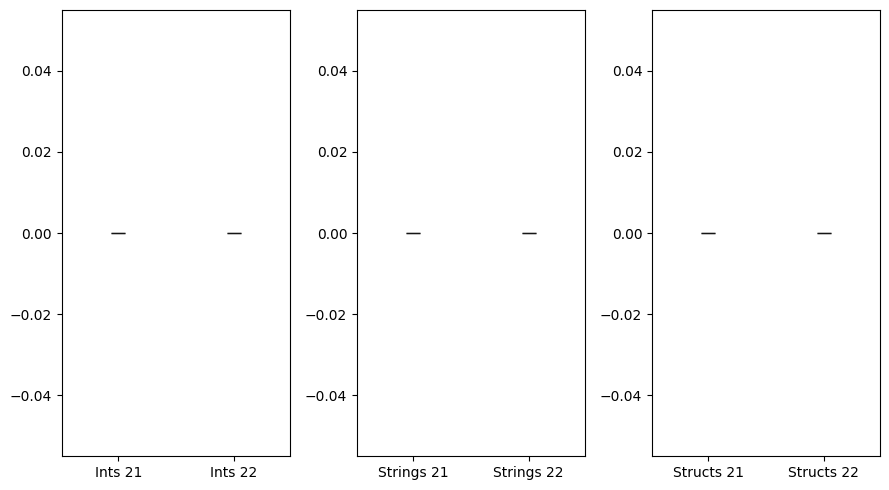

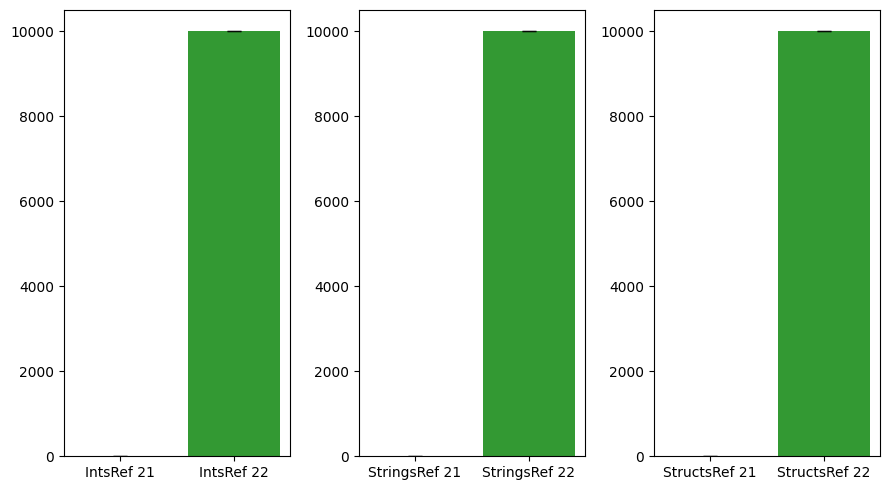

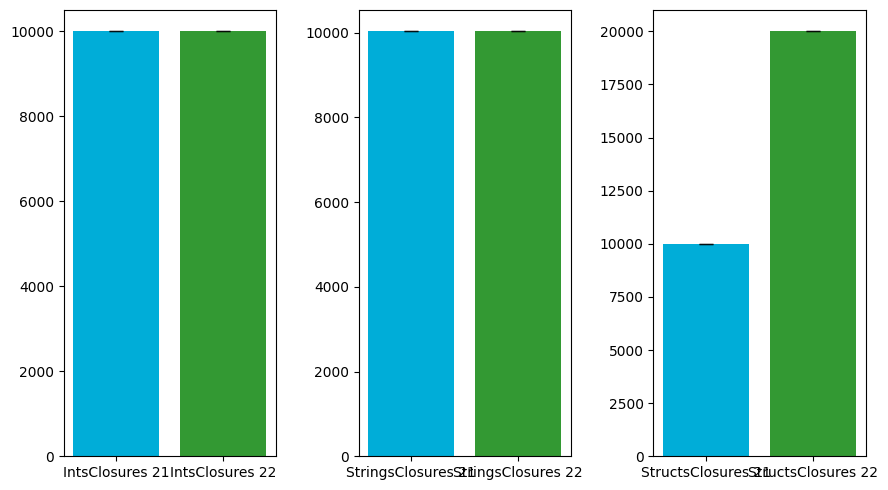

In [6]:
plot("allocs/op", ("Ints", "Strings", "Structs"))
plot("allocs/op", ("IntsRef", "StringsRef", "StructsRef"))
plot("allocs/op", ("IntsClosures", "StringsClosures", "StructsClosures"))

In [7]:
compare("allocs/op", ("Ints", "Strings", "Structs"))

,Benchmark,Go v1.21,Go v1.22,Rate
0,Ints,0.0,0.0,0
1,Strings,0.0,0.0,0
2,Structs,0.0,0.0,0


In [8]:
compare("allocs/op", ("IntsRef", "StringsRef", "StructsRef"))

,Benchmark,Go v1.21,Go v1.22,Rate
0,IntsRef,0.0,10000.0,Infinite
1,StringsRef,0.0,10004.0,Infinite
2,StructsRef,0.0,10000.0,Infinite


In [9]:
compare("allocs/op", ("IntsClosures", "StringsClosures", "StructsClosures"))

,Benchmark,Go v1.21,Go v1.22,Rate
0,IntsClosures,10003.0,10002.00,0.999900
1,StringsClosures,10031.1,10030.54,0.999944
2,StructsClosures,10003.0,20002.00,1.999600


## Bytes per Operation

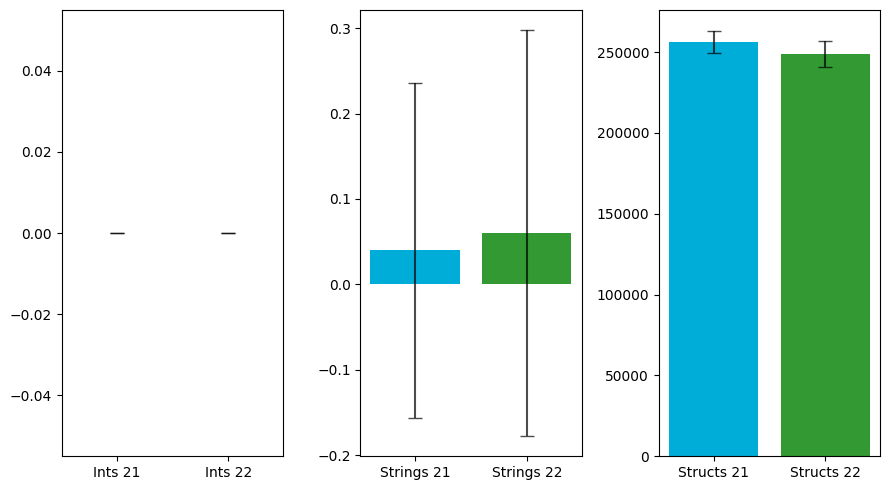

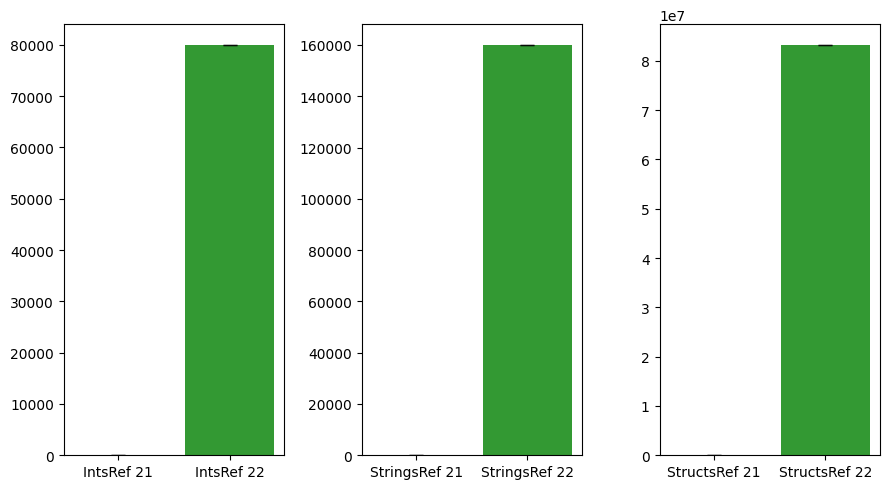

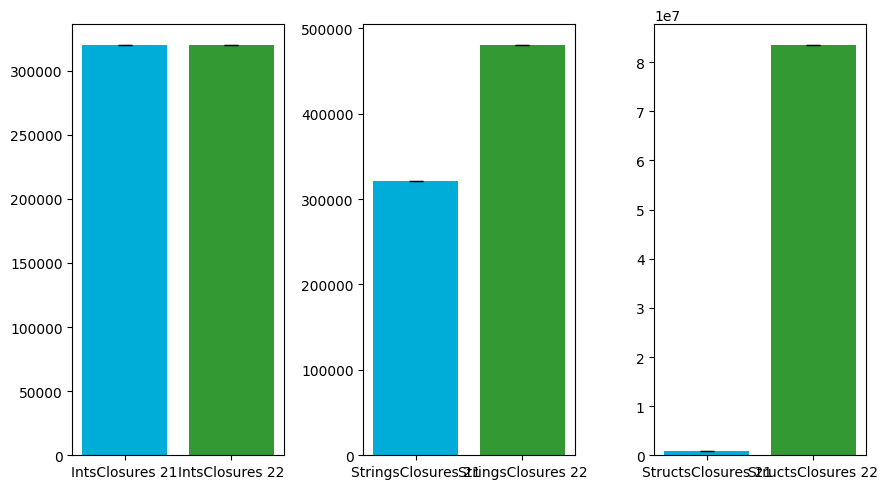

In [10]:
plot("B/op", ("Ints", "Strings", "Structs"))
plot("B/op", ("IntsRef", "StringsRef", "StructsRef"))
plot("B/op", ("IntsClosures", "StringsClosures", "StructsClosures"))

In [11]:
compare("B/op", ("Ints", "Strings", "Structs"))

,Benchmark,Go v1.21,Go v1.22,Rate
0,Ints,0.00,0.00,0.00000
1,Strings,0.04,0.06,1.50000
2,Structs,256121.92,248673.92,0.97092


In [12]:
compare("B/op", ("IntsRef", "StringsRef", "StructsRef"))

,Benchmark,Go v1.21,Go v1.22,Rate
0,IntsRef,0.0,80008.08,Infinite
1,StringsRef,0.0,160106.00,Infinite
2,StructsRef,161.9,83256464.24,514246.227548


In [13]:
compare("B/op", ("IntsClosures", "StringsClosures", "StructsClosures"))

,Benchmark,Go v1.21,Go v1.22,Rate
0,IntsClosures,320158.88,320162.62,1.000012
1,StringsClosures,320747.18,480755.46,1.498861
2,StructsClosures,923244.12,83536420.56,90.481400
